#Framingham Dataset For Logistic Regression

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
fileloc = "drive/My Drive/AIET-IIT/"
data = pd.read_csv(fileloc+"framingham.csv")

In [4]:
df = data
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#Stats

In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#Checking Null Values

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data.replace(np.nan,0,inplace= True)

In [9]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#Plotting

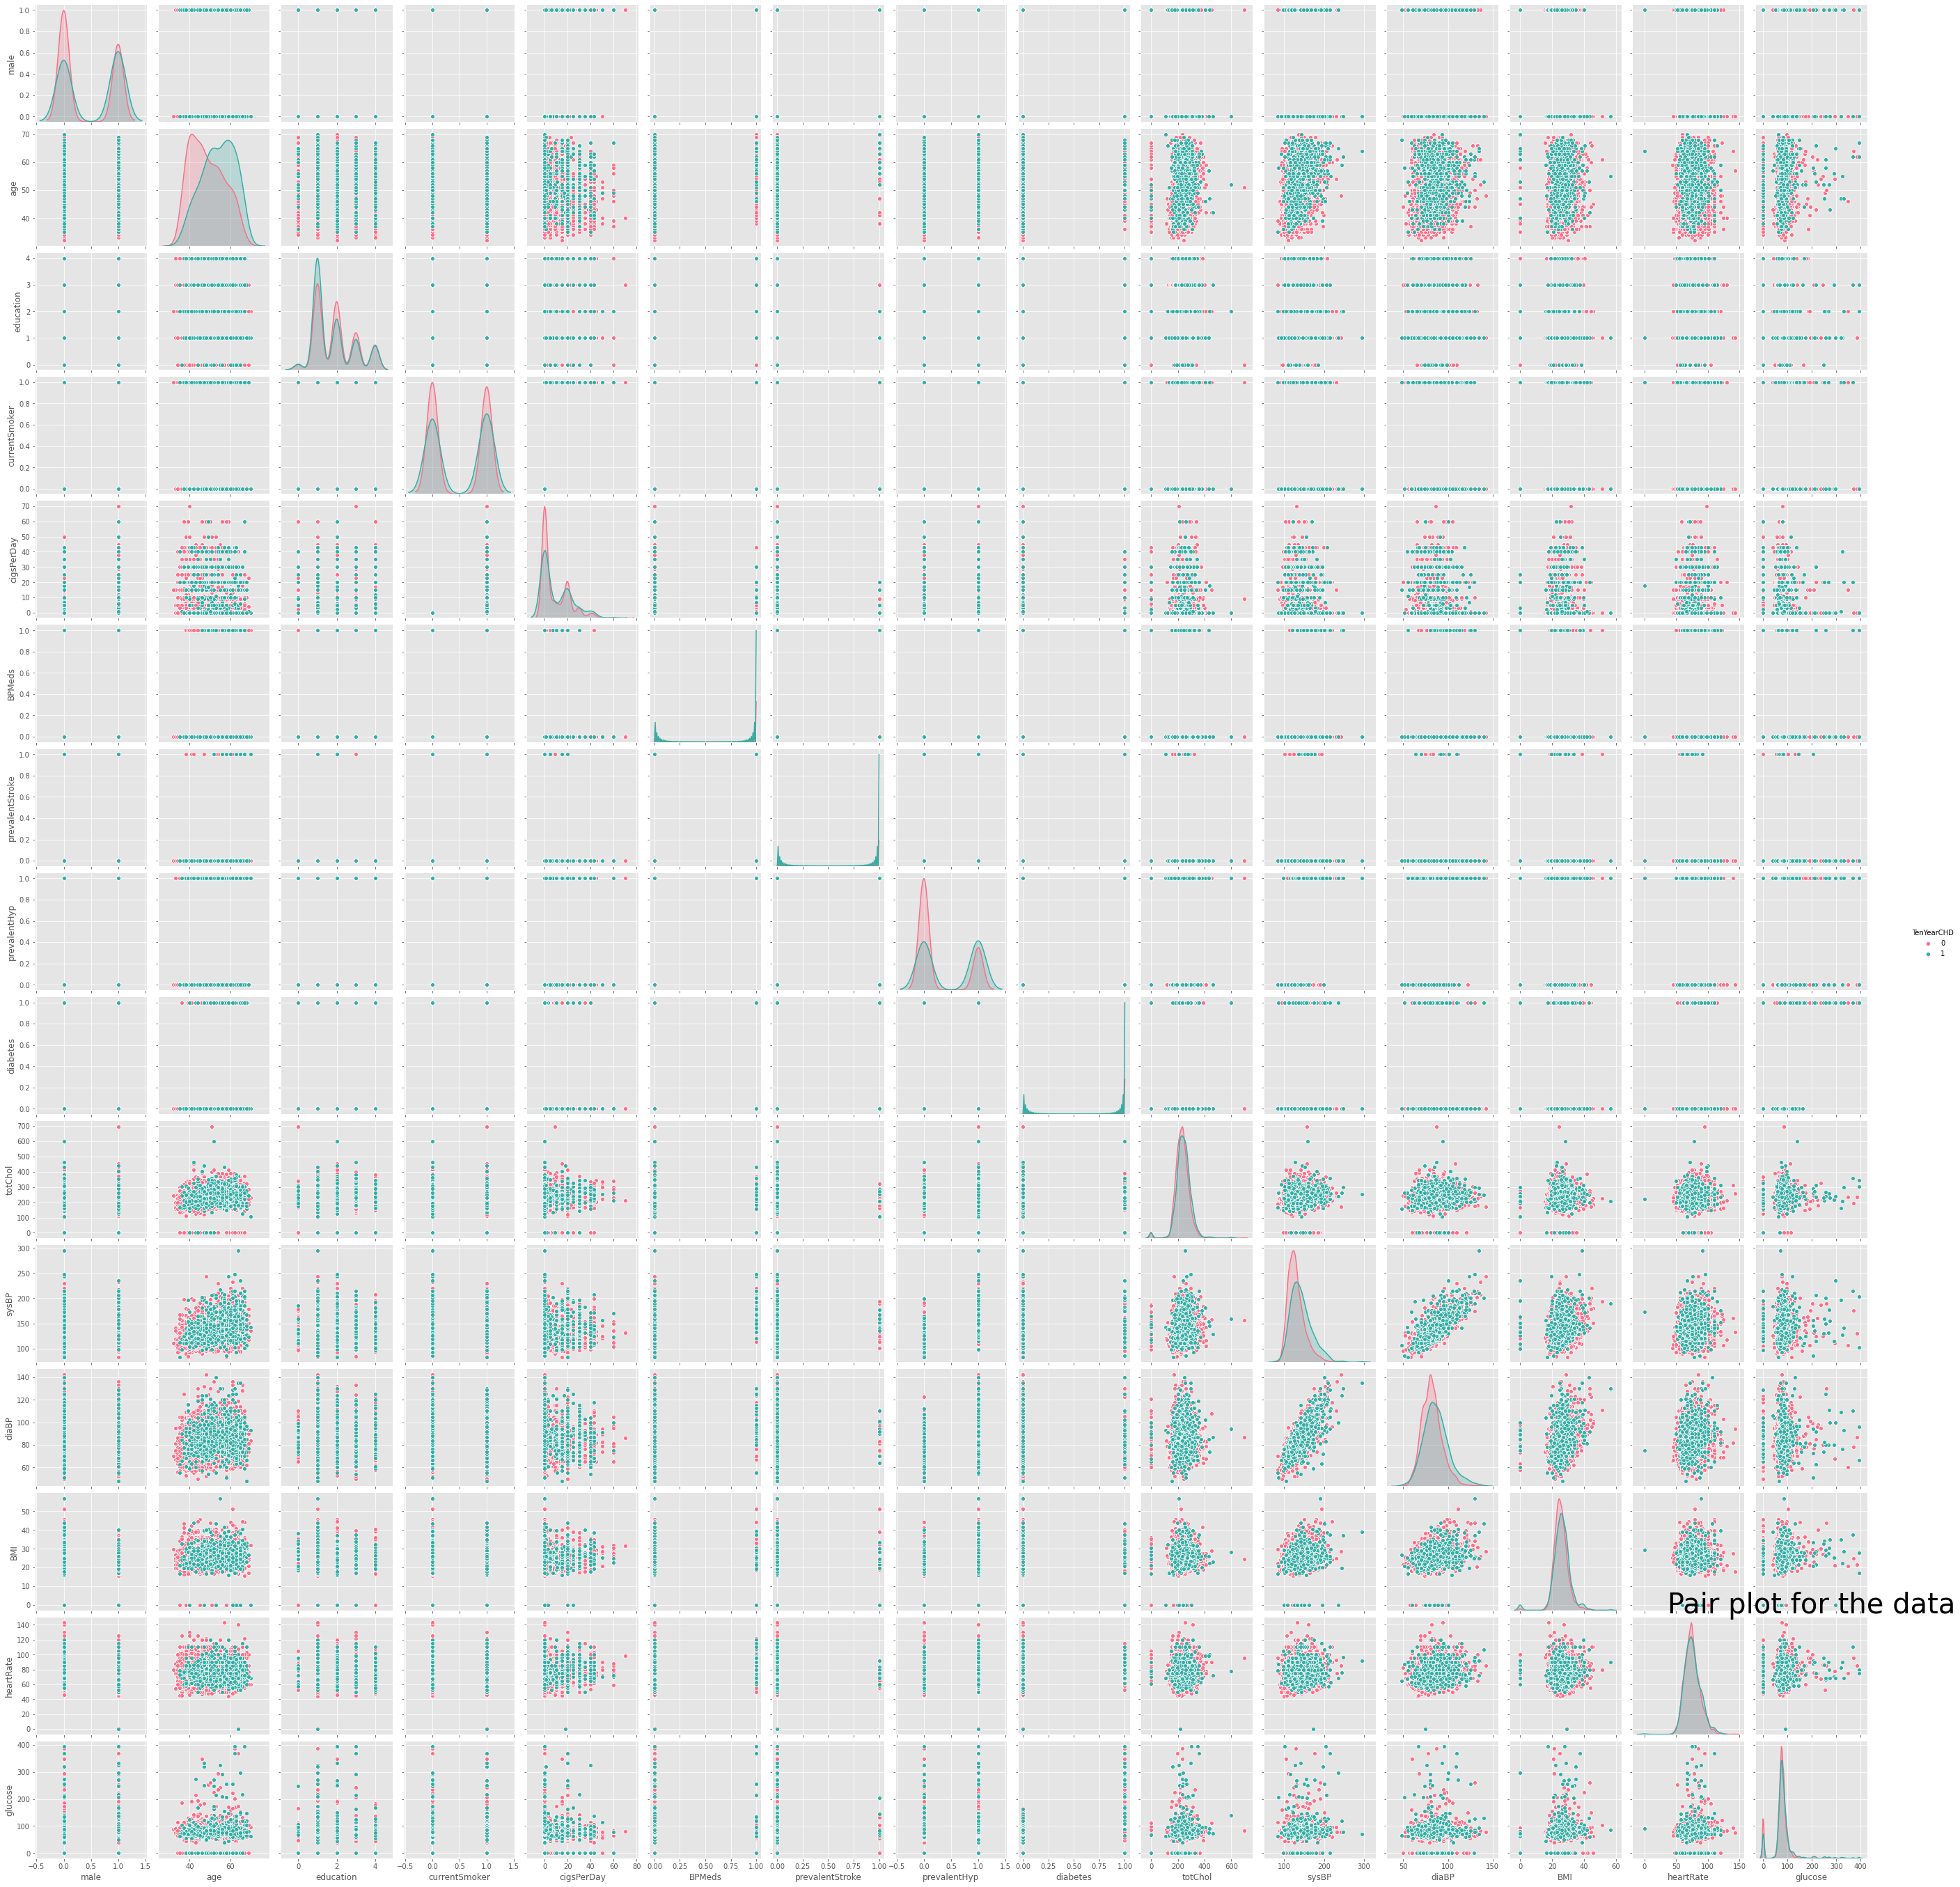

In [10]:
import seaborn as sns


plt.rcParams['figure.figsize'] = (55,56)
plt.style.use('ggplot')

sns.pairplot(data, hue = 'TenYearCHD', palette = 'husl')
plt.title('Pair plot for the data', fontsize = 40)
plt.show()

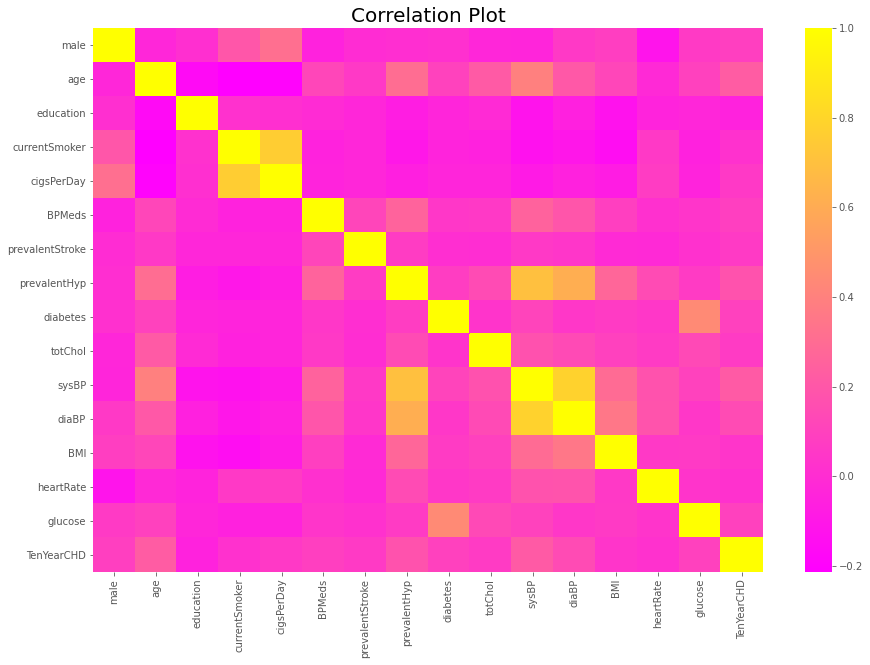

In [11]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')

sns.heatmap(data.corr(), cmap = 'spring')
plt.title('Correlation Plot', fontsize = 20)
plt.show()

#Splitting Data

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']
X_remain, X_test, y_remain, y_test = train_test_split(X,y,test_size = 0.10) 
print('\n \n There are {} samples in the training set and {} samples in the test set'.format(X_remain.shape[0], X_test.shape[0]))
print('\n \n There are {} samples in the training set and {} samples in the test set'.format(y_remain.shape[0], y_test.shape[0])) 


 
 There are 3816 samples in the training set and 424 samples in the test set

 
 There are 3816 samples in the training set and 424 samples in the test set


In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size= 0.2222)
print('\n \n There are {} samples in the training set and {} samples in the validation set and {} samples in the test set'.format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))



 
 There are 2968 samples in the training set and 848 samples in the validation set and 424 samples in the test set


In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
print("Accuracy on training data: %f"%(clf.score(X_train, y_train)))
print("Accuracy on training data: %f"%(clf.score(X_val, y_val)))
print("Accuracy on test data: %f"%(clf.score(X_test, y_test)))

Accuracy on training data: 0.854111
Accuracy on training data: 0.830189
Accuracy on test data: 0.863208


#Hyperparameter tunning

In [15]:
## Method 1 
C = [0.0001, 0.1, 0.5]
for each_C in C:
  logisticRegr = LogisticRegression(C = each_C)
  logisticRegr.fit(X_train, y_train)
  score = logisticRegr.score(X_val, y_val)
  print("For C value {}, the score obtained is {}".format(each_C, score))

For C value 0.0001, the score obtained is 0.8266509433962265
For C value 0.1, the score obtained is 0.8301886792452831
For C value 0.5, the score obtained is 0.8301886792452831


In [16]:
logisticRegr = LogisticRegression(C = 0.5)
logisticRegr.fit(X_train, y_train)
test_score = logisticRegr.score(X_test, y_test)
print(test_score)

0.8608490566037735


In [17]:
## Method 2 - Grid Search Method
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs'], 'penalty':['l1', 'l2'], 'max_iter':[100, 500], 'C':[0.01, 0.1]}
logisticRegr = LogisticRegression()
clf = GridSearchCV(logisticRegr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1], 'max_iter': [100, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
print(clf.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [19]:
score = clf.score(X_test, y_test)
print(score)

0.875


#Confusion Matrix

Text(0.5, 69.0, 'Predicted')

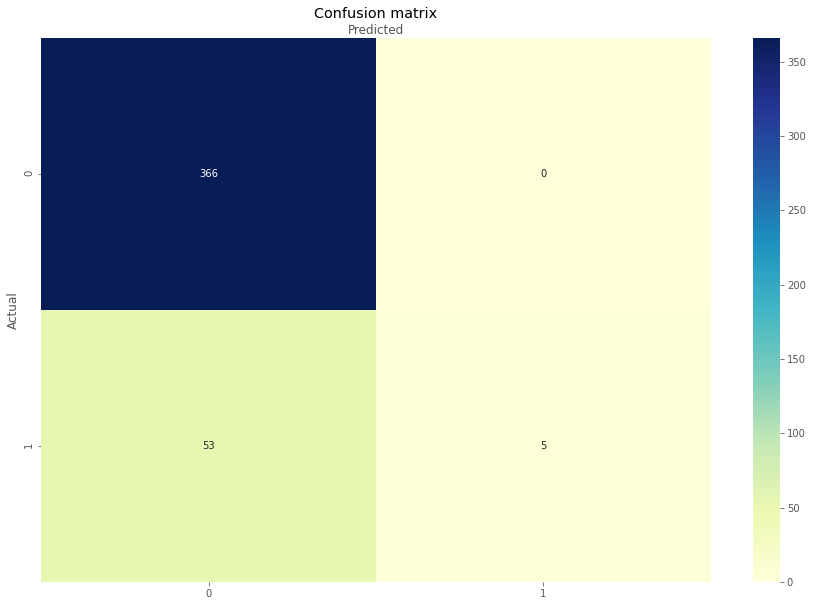

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = list(range(10))
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#ROC

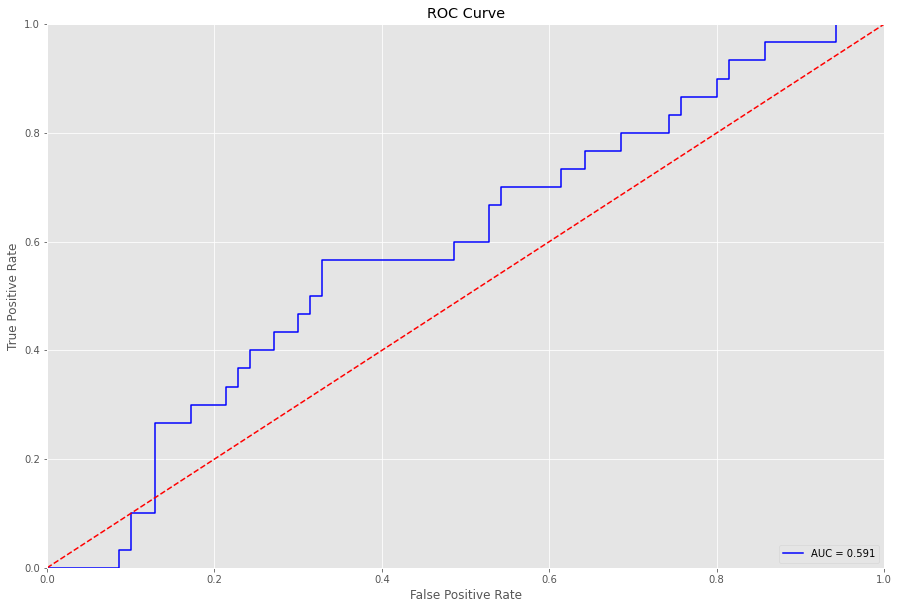

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import auc, roc_auc_score, roc_curve


def plot_roc_curve(labels, predictions):
    """
    Plot ROC curve
    """
    fpr, tpr, threshold = roc_curve(labels, predictions)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


if __name__ == "__main__":
    n = 100  # sample size
    k = 30  # number of 1s
    y_true = np.zeros(n, dtype=int)
    idx = random.sample(range(n), k)
    y_true[idx] = 1
    # print(y_true)
    y_scores = [random.random() for i in range(n)]
    # print(y_scores)
    plot_roc_curve(y_true, y_scores)

#Another Code

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
import os
import sys
sys.path.append('//anaconda/lib/python3.6/site-packages')
###################always keep the above code#####################
 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris=load_iris()
 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
 
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: %f" % logreg.score(X_test, y_test))
 
###1. Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)
#[[13  0  0]
# [ 0  2 14]
# [ 0  0  9]]
 
###2.  ROC curves
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = %.02f  accuracy = %.02f  AUC = %.02f" % (gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma=%.03f" % gamma, linewidth=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show()
#gamma = 1.00  accuracy = 0.90  AUC = 0.50
#gamma = 0.05  accuracy = 0.90  AUC = 1.00
#gamma = 0.01  accuracy = 0.90  AUC = 1.00
 
###Two detailed evaluation methods on the task of classifying the 10 different hand-written digits
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
print("confusion matrix:")
print(confusion_matrix(y_test, pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))